# PAN Card  Tampering Detection


the purpose of this project is to detect tampering PAN card using computer vision. This project will help different organization in detecting whether the id i.e. the PAN card provided to them by their employees or customers or anyone is original or not.

In [6]:
#Import necessary libraries: 
#1 Skimage: Scikit-image, or ski-mage, is an open-source Python package, in this project most of the image processing techniques will be used via scikit-image
#2 imutils: Imutils are a series of convenience functions to make basic image processing functions such as translation, rotation, resizing, and displaying images easier with OpenCV.
#3 cv2: OpenCV (Open Source Computer Vision Library) is a library of programming functions. Here in this project major reading and writing of the image are done via cv2.
#4 PIL: PIL (Python Imaging Library) is a free and open-source additional library for the Python programming language that adds support for opening, manipulating, and saving many different image file formats.

#[install packages :
# cv2 :pip install opencv-python 
# imutils : pip install imutils]

from skimage.metrics import structural_similarity #1
import imutils #2
import cv2 #3
from PIL import Image #4
import requests #5


### Scraping original and tampered PAN card from different sources


In [7]:
original = Image.open(requests.get('https://www.tunisienumerique.com/wp-content/uploads/2018/11/abus.jpg', stream=True).raw)
tampered = Image.open(requests.get('https://shuftipro.com/wp-content/uploads/NIC-min-4.png', stream=True).raw)

## Loading original and user-provided images

In [8]:
# The file format of the source file.
print("Original image format : ",original.format) 
print("Tampered image format : ",tampered.format)
# Image size, in pixels. The size is given as a 2-tuple (width, height).
print("Original image size : ",original.size) 
print("Tampered image size : ",tampered.size)

Original image format :  JPEG
Tampered image format :  PNG
Original image size :  (680, 400)
Tampered image size :  (524, 519)


## Converting the format of a tampered image similar to the original image

In [9]:
#Resize image
original = original.resize((250,160))
print(original.size)
original.save('C:/Users/PC/Desktop/DataScience/Project 1/images/original.png')
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('C:/Users/PC/Desktop/DataScience/Project 1/images/tampered.png')


(250, 160)
(250, 160)


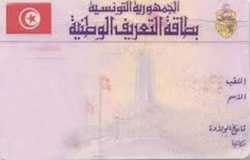

In [10]:
original

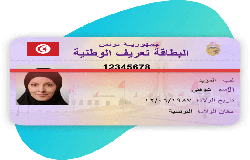

In [11]:
tampered

# #Reading images using OpenCV.


In [15]:
#load the two input images
original = cv2.imread('C:/Users/PC/Desktop/DataScience/Project 1/images/original.png')
tampered = cv2.imread('C:/Users/PC/Desktop/DataScience/Project 1/images/tampered.png')

In [16]:
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)

In [19]:
#Compute the Structural Similarity Index(SSIM) between the two images,
#Ensuring that the difference image is returned
(score,diff) = structural_similarity(original_gray,tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM Score is {}".format(score * 100))
if score >= 80 :
    print("The given pan card is original")
else :
    print("The given pan card is tampered")

SSIM Score is 22.039217512999986
The given pan card is tampered
